<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Required-Packages" data-toc-modified-id="Importing-Required-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Required Packages</a></span></li><li><span><a href="#Importing-Dataset" data-toc-modified-id="Importing-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Dataset</a></span></li><li><span><a href="#Preprocessing-Data" data-toc-modified-id="Preprocessing-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing Data</a></span><ul class="toc-item"><li><span><a href="#Handling-Missing-Values" data-toc-modified-id="Handling-Missing-Values-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Handling Missing Values</a></span></li><li><span><a href="#Calculating-Price-Returns" data-toc-modified-id="Calculating-Price-Returns-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Calculating Price Returns</a></span></li><li><span><a href="#Volatility-(Magnitude-of-Returns)" data-toc-modified-id="Volatility-(Magnitude-of-Returns)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Volatility (Magnitude of Returns)</a></span></li><li><span><a href="#Exporting-the-Dataframe" data-toc-modified-id="Exporting-the-Dataframe-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Exporting the Dataframe</a></span></li><li><span><a href="#Importing-the-Dataframe" data-toc-modified-id="Importing-the-Dataframe-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Importing the Dataframe</a></span></li></ul></li><li><span><a href="#Preliminary-Data-Visulaizations" data-toc-modified-id="Preliminary-Data-Visulaizations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preliminary Data Visulaizations</a></span></li></ul></div>

# Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn import preprocessing

sns.set()
warnings.filterwarnings("ignore")

Install **yfinance** if needed by un-commenting out this cell.

In [2]:
# !pip install yfinance

In [3]:
import yfinance

# Importing Dataset

The dataset is taken from **yfinance**.

It contains daily data from - **1994-01-06** to **2019-08-30** for the market index - **S&P 500**

In [4]:
raw_data = yfinance.download (tickers = "^GSPC", start = "1994-01-07", 
                              end = "2019-09-01", interval = "1d")

[*********************100%***********************]  1 of 1 completed


First few rows of the dataset are as follows.

In [5]:
raw_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1994-01-06,467.549988,469.000000,467.019989,467.119995,467.119995,365960000
1994-01-07,467.089996,470.260010,467.029999,469.899994,469.899994,324920000
1994-01-10,469.899994,475.269989,469.549988,475.269989,475.269989,319490000
1994-01-11,475.269989,475.279999,473.269989,474.130005,474.130005,305490000
1994-01-12,474.130005,475.059998,472.140015,474.170013,474.170013,310690000


Last few rows of the dataset are as follows.

In [6]:
raw_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-26,2866.699951,2879.270020,2856.000000,2878.379883,2878.379883,2857600000
2019-08-27,2893.139893,2898.790039,2860.590088,2869.159912,2869.159912,3533630000
2019-08-28,2861.280029,2890.030029,2853.050049,2887.939941,2887.939941,3097420000
2019-08-29,2910.370117,2930.500000,2905.669922,2924.580078,2924.580078,3176190000
2019-08-30,2937.090088,2940.429932,2913.320068,2926.459961,2926.459961,3008450000


Building the final Dataframe from the **closing prices** of **S&P 500** stocks.

In [7]:
# Making a backup dataframe
df_comp = raw_data.copy()

# Adding columns of interest to the new dataframe
df_comp['spx'] = df_comp.Close[:]

# Final Dataframe
data = df_comp[['spx']]

# Making sure the data follows the periodicity of business days
data = data.asfreq('b')

# Preprocessing Data

First few rows of the working dataframe.

In [8]:
data.head()

,spx
Date,
1994-01-06,467.119995
1994-01-07,469.899994
1994-01-10,475.269989
1994-01-11,474.130005
1994-01-12,474.170013


## Handling Missing Values

Statistical description of the dataset

In [9]:
data.describe()

,spx
count,6459.000000
mean,1380.614234
std,595.236124
min,438.920013
25%,1023.675018
50%,1263.819946
75%,1562.484985
max,3025.860107


Number of missing values in each column.

In [11]:
data.isnull().sum()

spx    0
dtype: int64

Using **Front Fill (ffill)** method in pandas.

In [12]:
data.spx = data.spx.fillna(method='ffill')

data.isna().sum()

spx    0
dtype: int64

New Statistical Description of the dataset.

In [13]:
data.describe()

,spx
count,6692.000000
mean,1380.895551
std,594.732128
min,438.920013
25%,1024.077515
50%,1264.350037
75%,1562.477478
max,3025.860107


## Calculating Price Returns

For each market index the **Returns** at time **t** is defined as follows -

$Returns(t) = \frac{Price(t) - Price(t-1)}{Prices(t-1)} * 100$

In [14]:
data["spx_ret"] = data.spx.pct_change(1).mul(100)

New Dataframe after adding **Returns** for each market index.

In [15]:
data.head()

,spx,spx_ret
Date,,
1994-01-06,467.119995,NaN
1994-01-07,469.899994,0.595136
1994-01-10,475.269989,1.142795
1994-01-11,474.130005,-0.239860
1994-01-12,474.170013,0.008438


## Volatility (Magnitude of Returns)

Volatility in the returns of a market index are a measure of the stability in the index.

$Volatility(t) = |Returns(t)|$

In [16]:
data["spx_vol"] = data.spx_ret.abs()

New Dataframe after adding **Volatility** of each market index.

In [17]:
data.head()

,spx,spx_ret,spx_vol
Date,,,
1994-01-06,467.119995,NaN,NaN
1994-01-07,469.899994,0.595136,0.595136
1994-01-10,475.269989,1.142795,1.142795
1994-01-11,474.130005,-0.239860,0.239860
1994-01-12,474.170013,0.008438,0.008438


## Exporting the Dataframe

In [18]:
data.reset_index().to_csv("data.csv", index = False)
pd.read_csv("data.csv").to_csv("data.csv", index = False)

## Importing the Dataframe

In [19]:
data = pd.read_csv("data.csv")
data.Date = pd.to_datetime(data.Date)
data.set_index("Date", inplace = True)

# Preliminary Data Visulaizations

In [20]:
data.head()

,spx,spx_ret,spx_vol
Date,,,
1994-01-06,467.119995,NaN,NaN
1994-01-07,469.899994,0.595136,0.595136
1994-01-10,475.269989,1.142795,1.142795
1994-01-11,474.130005,-0.239860,0.239860
1994-01-12,474.170013,0.008438,0.008438


The following line plots shows the trend of all columns of the dataframe above.

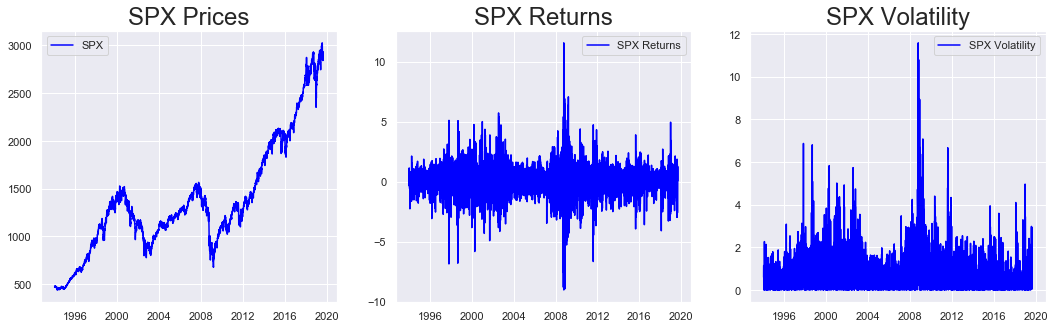

In [23]:
plt.rcParams["figure.figsize"] = (18, 5)

fig, ax = plt.subplots(1, 3)

ax[0].plot(data.spx, color = "blue", label = "SPX")
ax[0].set_title("SPX Prices", size = 24)
ax[0].legend()

ax[1].plot(data.spx_ret, color = "blue", label = "SPX Returns")
ax[1].set_title("SPX Returns", size = 24)
ax[1].legend()

ax[2].plot(data.spx_vol, color = "blue", label = "SPX Volatility")
ax[2].set_title("SPX Volatility", size = 24)
ax[2].legend()

plt.show()